# Model Comparison

In [19]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate
from PIL import Image
from Model_comparison_functions import *

Set path:


In [20]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Different forecasts\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [21]:
# Choose the base setting.
# The loaded data has the following forecasts
SampleSizes = [5]
forecast = [1,2,3,4]

# Which
Forecast_examination_idx = [0,1,2,3] # forecast[Forecast_examination_idx] = 2
SampleSize_examination_idx = [0] # SampleSize[SampleSize_examination_idx] = 5
forecast_idx = forecast[0]
SampleSize_idx = SampleSizes[0]

In [22]:
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')


In [23]:
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=4, SampleSizes=SampleSizes)

In [24]:
print(np.shape(Array))

(4, 1, 88, 5, 2)


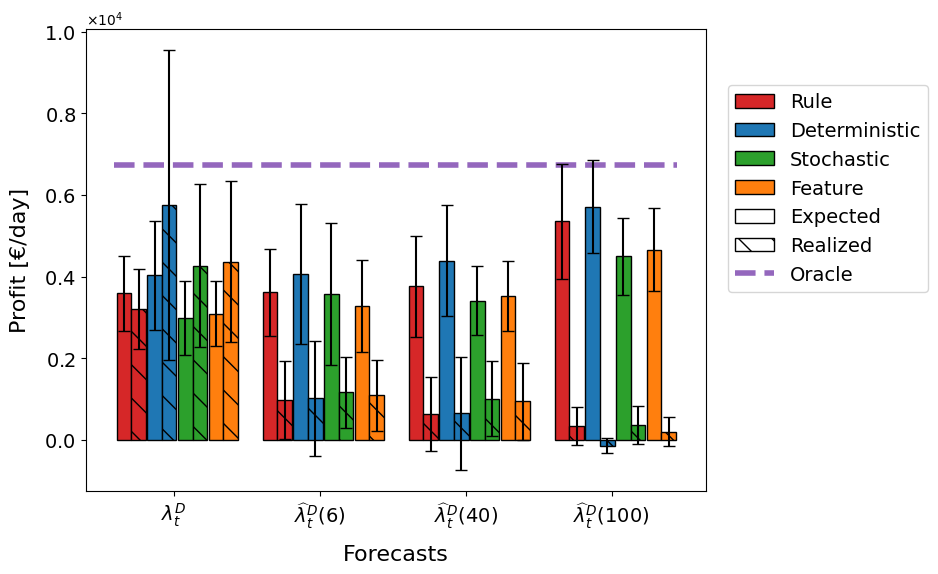

In [25]:
plot_profit_Test(Array,'Forecasts', Forecast_examination_idx, SampleSize_examination_idx, barwidth = 0.1, Forecast_label = ["$\lambda_{t}^{D}$","$\widehat{\lambda}_{t}^{D}(6)$","$\widehat{\lambda}_{t}^{D}(40)$","$\widehat{\lambda}_{t}^{D}(100)$"],  ShowEachTestDay = False,save=True)